<a href="https://colab.research.google.com/github/Ign4cho/ProyectoBI/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción
Carga de datos

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
csv_path = "datasets\\2023-3-MARZO\EXTRACCION_Prov-San-Juan_032023.csv"


In [2]:
"""
from google.colab import drive
drive.mount('/content/drive')
"""

Mounted at /content/drive


In [16]:
cantidad_filas = 3000000
column_types = {
            'CODIGOENTIDAD': 'float64',
            'IDLINEA': 'float64',
            'NROCHIP': 'float64',
            'NROTARJETA': 'float64',
            'CODIGOCONTRATO': 'float64',
            'SECUENCIA_TARJETA': 'float64',
            'FECHATRX': 'string',
            'MONTO': 'float64',
            'SALDO': 'float64',
            'VALOR_TARIFA': 'float64',
            'INTERNO': 'float64',
            'DISPOSITIVO': 'float64',
            'SECTERMINAL': 'float64',
            'CODIGOTIPOTRX': 'float64',
            'CODIGOSUBTIPOTRX': 'float64',
            'TIPOMAPPING': 'float64',
            'ENTIDAD_EMISORA_TARJ': 'float64',
            'CODIGOERROR': 'float64',
            'FECHAPROCESO': 'string',
            'RAMAL': 'float64',
            'IDARCHIVOINTERCAMBIO': 'float64',
            'CODIGOROL': 'string',
            'CODIGOTIPOTARJETA': 'float64',
            'SENTIDO': 'string',
            'MONEDERO_ID': 'float64',
            'EMISOR_CONTRATO': 'float64',
            'SAM_ID': 'string',
            'LG_ID': 'float64',
            'TIPO_TERMINAL': 'float64',
            'ID_SERVICIO': 'float64',
            'VERSION_TIPO_TRX': 'float64',
            'ID_INTEGRADOR': 'float64',
            'EMISOR_MONEDERO': 'float64',
            'SECCION_FIN': 'float64',
            'SECCION_INICIO': 'float64',
            'DESCUENTO': 'float64',
            'PROVISION': 'float64',
            'ID_POSICIONAMIENTO': 'float64',
            'PTC': 'float64',
            'LTC': 'float64'
        }

In [17]:
def load_data():
    return pd.read_csv(csv_path, delimiter=';', on_bad_lines='skip', decimal=',',
                        nrows=cantidad_filas,
                          dtype=column_types)
    #si hace falta agregar: nrows=cantidad_filas,


In [18]:
data=load_data()

In [19]:
columnas_importantes = ['CODIGOENTIDAD', 'IDLINEA', 'NROTARJETA', 'CODIGOCONTRATO',
                            'FECHATRX','CODIGOTIPOTRX','RAMAL','ID_POSICIONAMIENTO','ID_COMBINACION']
df = data[columnas_importantes]
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 9 columns):
 #   Column              Dtype  
---  ------              -----  
 0   CODIGOENTIDAD       float64
 1   IDLINEA             float64
 2   NROTARJETA          float64
 3   CODIGOCONTRATO      float64
 4   FECHATRX            string 
 5   CODIGOTIPOTRX       float64
 6   RAMAL               float64
 7   ID_POSICIONAMIENTO  float64
 8   ID_COMBINACION      float64
dtypes: float64(8), string(1)
memory usage: 206.0 MB


# Comentarios

## Describe e Info
La mayoría de los valores no son necesariamente numéricos, pero vemos que la mayoría son non-null por lo menos.

In [ ]:
df.head()

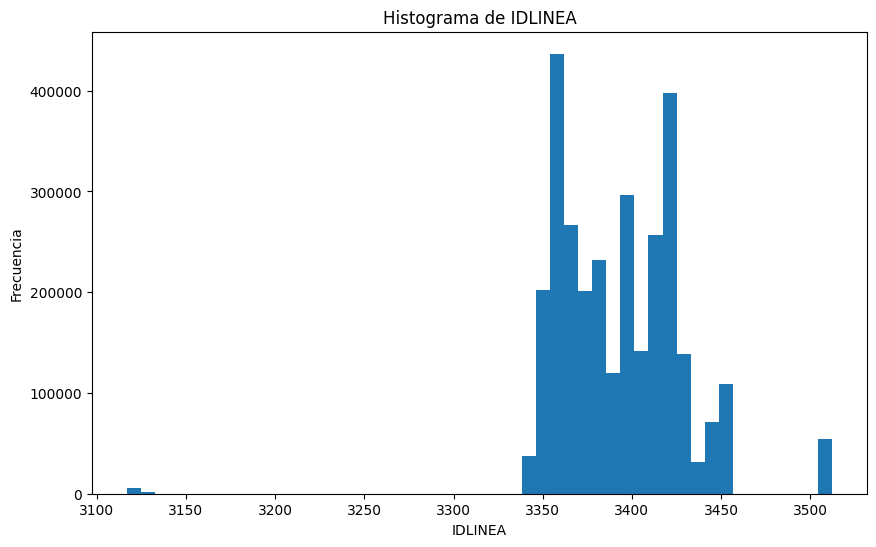

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(df['IDLINEA'].dropna(), bins=50)  # Usamos dropna para eliminar valores nulos
plt.xlabel('IDLINEA')
plt.ylabel('Frecuencia')
plt.title('Histograma de IDLINEA')
plt.show()


In [ ]:

idlinea_counts = df['IDLINEA'].value_counts(dropna=False)
print(idlinea_counts)


# Visualizaciones
Vamos a probar algunas visualizaciones
Primero vamos a ver de Codigotipotrx que es el codigo tipo transacción. Según el excel tiene dos valores posibles: 12 y 22.
Después anazlizamos también el ID_COMBINACIÓN

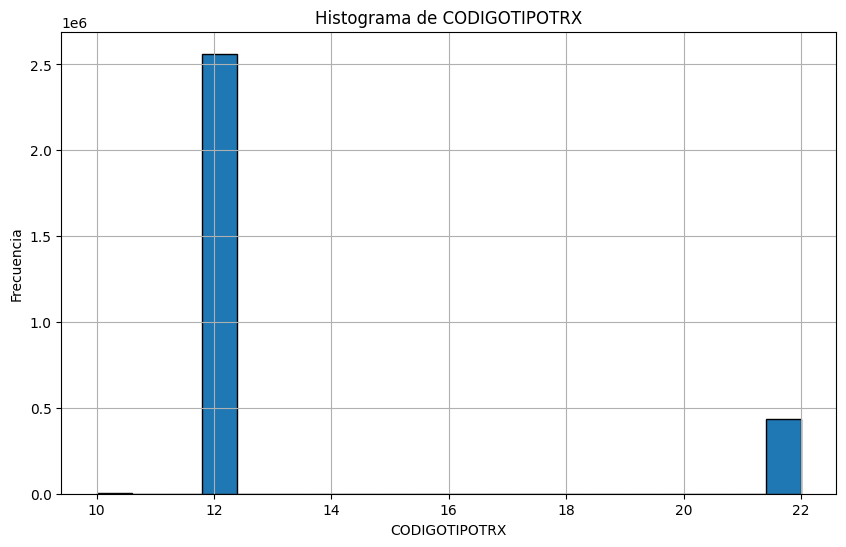

In [30]:

plt.figure(figsize=(10, 6))
plt.hist(df['CODIGOTIPOTRX'], bins=20, edgecolor='black')
plt.title('Histograma de CODIGOTIPOTRX')
plt.xlabel('CODIGOTIPOTRX')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


No coincide con lo que nos dice en el excel
Vamos a estudiarlo con una tabla de frecuencia

In [34]:
df.value_counts('CODIGOTIPOTRX', dropna=False)


,count
CODIGOTIPOTRX,
12.0,2562330
22.0,436343
10.0,1327


In [20]:
df.value_counts('ID_COMBINACION', dropna=False)

ID_COMBINACION
NaN     2584282
1.0      397940
2.0       16440
3.0        1337
71.0          1
Name: count, dtype: int64

tampoco coincide con las tablas

In [21]:
df.value_counts('CODIGOCONTRATO', dropna=False)

CODIGOCONTRATO
621.0    1817841
602.0    1143029
649.0      37199
641.0        652
787.0        587
662.0        525
786.0        167
Name: count, dtype: int64

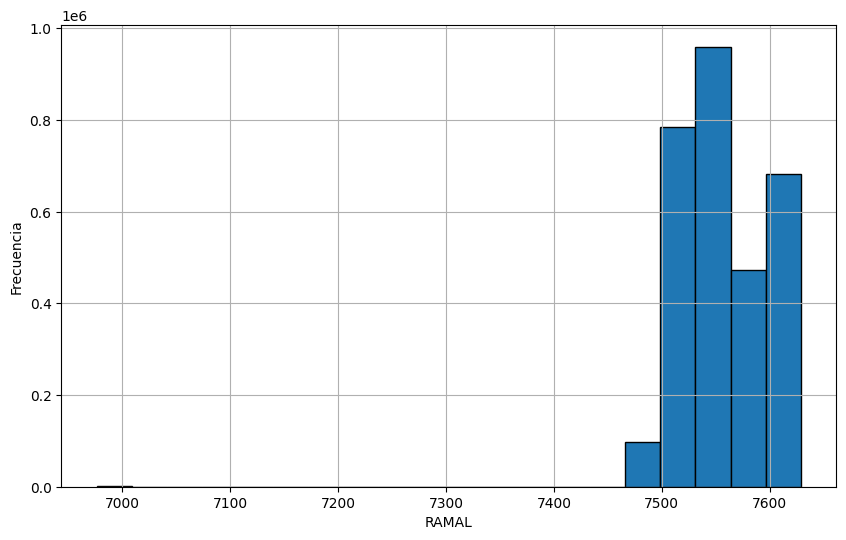

In [24]:
# mostrar histograma de ramal y luego contar nan
plt.figure(figsize=(10, 6))
plt.hist(df['RAMAL'], bins=20, edgecolor='black')
plt.xlabel('RAMAL')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.title('Histograma de RAMAL')
plt.show()

Ramal no tiene NANs

# Tabla GPS

## Carga de datos


In [20]:

path_gps = "/content/drive/MyDrive/Colab Notebooks/GPS_SAN_JUAN_032023.csv"
filas_gps = 28000

columna_gps = [
        'CODIGOENTIDAD', 'IDLINEA', 'DATE_TIME', 'LONGITUDE', 'LATITUDE', 'VELOCITY'
    ]
tipo_gps = {
    "CODIGOENTIDAD": "int64",
    "IDLINEA": "int64",
    "INTERTNO": "float64",
    "C_LD_ID (RAMAL)": "int64",
    "FILE_ID": "float64",
    "DTSN": "float64",
    "DATE_TIME": "datetime64[ns]",
    "TYPE": "int64",
    "DIRECTION": "int64",
    "LONGITUDE": "float64",
    "LATITUDE": "float64",
    "VELOCITY": "float64",
    "DISTANCE": "float64",
    "STATUS": "int64",
    "CONTROL_POINT": "int64"
}



In [13]:
def load_data_GPS():
    return pd.read_csv(
        path_gps,
        dtype=tipo_gps,
        delimiter=';',
        on_bad_lines='skip',
        decimal=',',
        nrows=filas_gps)


In [21]:
df_gps = load_data_GPS()

In [15]:
df_gps.head()

,codigoentidad,idlinea,interno,c_ld_Id,file_id,FILENAME,record_type,dtsn,date_time,TYPE,direction,device,longitude,latitude,velocity,distance,status,c_control_point
0,514,3126.0,100,6976,302587652,LSR_0514_340_00100_0000004151_02726_20230318_1...,220,2078726,06/03/2023 08:44:04,3,0,4151,-69.23099,-30.28858,0,90786,8,37
1,514,3126.0,100,6976,302587652,LSR_0514_340_00100_0000004151_02726_20230318_1...,220,2078717,06/03/2023 08:40:04,3,0,4151,-69.22225,-30.30829,0,88050,8,36
2,514,3126.0,100,6976,302587652,LSR_0514_340_00100_0000004151_02726_20230318_1...,220,2078696,06/03/2023 08:36:03,3,0,4151,-69.21514,-30.31642,42,86533,8,35
3,514,3126.0,100,6976,302587652,LSR_0514_340_00100_0000004151_02726_20230318_1...,220,2078671,06/03/2023 08:32:02,3,0,4151,-69.20416,-30.32098,0,85006,8,34
4,514,3126.0,100,6976,302587652,LSR_0514_340_00100_0000004151_02726_20230318_1...,220,2078668,06/03/2023 08:28:02,3,0,4151,-69.20639,-30.353,65,81253,8,33


## Visualizaciones


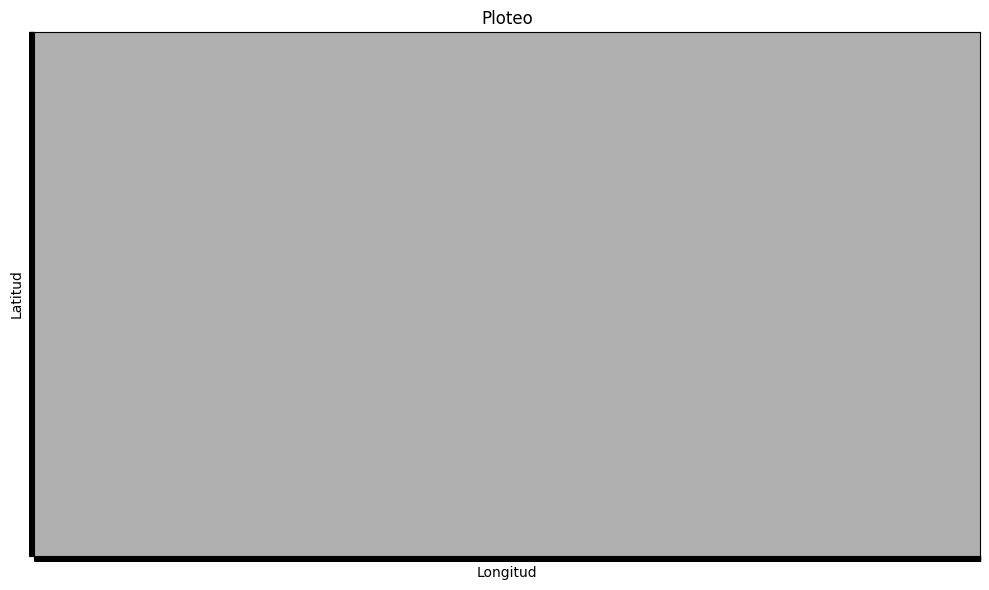

In [22]:
lat_min, lat_max = df_gps['latitude'].min(), df_gps['latitude'].max()
lon_min, lon_max = df_gps['longitude'].min(), df_gps['longitude'].max()


plt.figure(figsize=(10,6))
plt.scatter(df_gps['longitude'], df_gps['latitude'], c='blue', marker='o', alpha=0.3, s=10)
plt.xlim(lon_min, lon_max)
plt.ylim(lat_min, lat_max)
plt.tick_params(axis='x', labelbottom=False)
plt.tick_params(axis='y', labelleft=False)
plt.title('Ploteo')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.tight_layout()
plt.grid(True)
plt.show()
